# ARIMA and autoARIMA


`pip install pmdarima`


In [14]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error

In [15]:
from aeon.forecasting.arima import ARIMA

In [16]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

0.04356744949188808

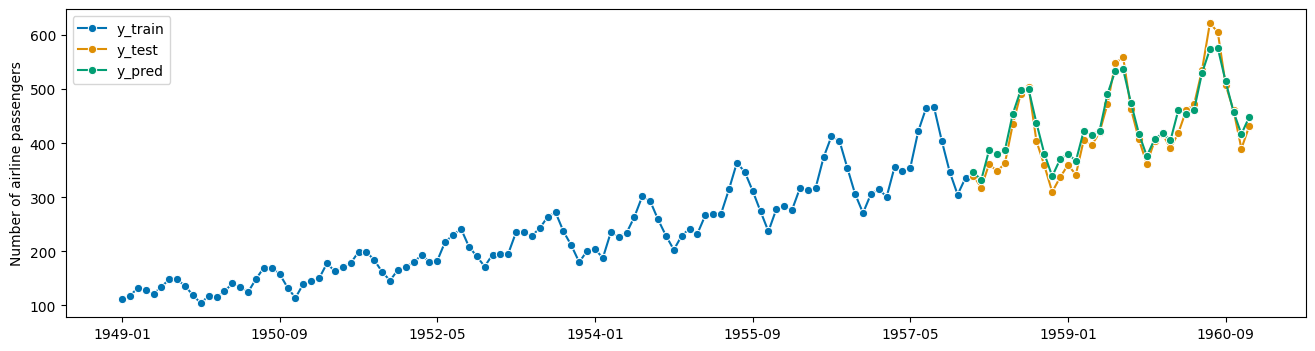

In [17]:
forecaster = ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))

fh = np.arange(len(y_test)) + 1
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [18]:
from aeon.forecasting.arima import AutoARIMA

0.04148971434138202

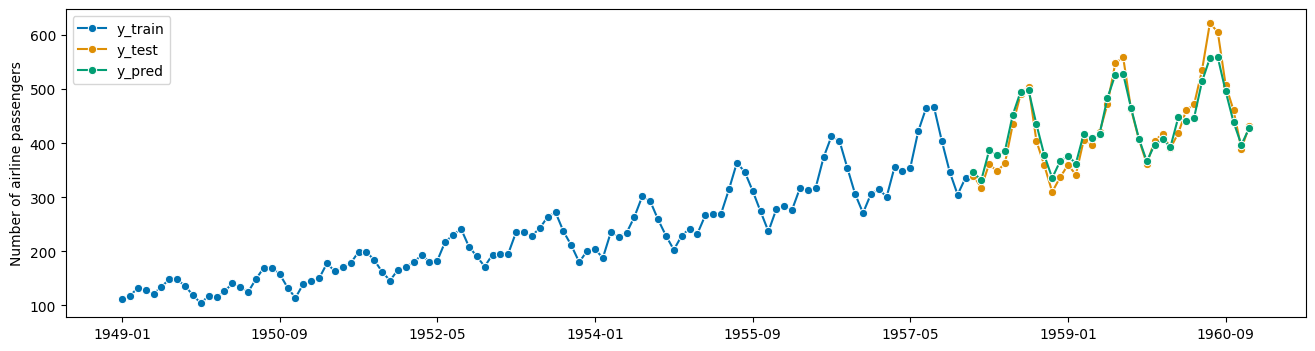

In [19]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [20]:
# to obtain the fitted parameters, run
forecaster.get_fitted_params()

{'ar.L1': -0.2411177593160947,
 'sigma2': 92.74985957133522,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 704.0011679025909,
 'aicc': 704.1316026851996,
 'bic': 709.108921685792,
 'hqic': 706.0650836395923}